<a href="https://colab.research.google.com/github/kelvinfoo123/Deep-Learning-Projects/blob/main/Lung_Cancer_Classification_(Tensorflow_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

cancer = pd.read_csv("lung_cancer.csv")
cancer.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


**Data Preprocessing**

In [ ]:
cancer.duplicated().sum() # There are 33 duplicated samples in the dataset. 

# Drop duplicate
cancer.drop_duplicates(inplace = True)

In [ ]:
# Label Encoder 

from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
cancer["GENDER"] = encoder.fit_transform(cancer["GENDER"])
cancer["LUNG_CANCER"] = encoder.fit_transform(cancer["LUNG_CANCER"])

In [ ]:
# Split into X and y 

X = cancer.drop(["LUNG_CANCER"], axis = 1)
y = cancer["LUNG_CANCER"]

In [ ]:
# Change 1 and 2 to 0 and 1 

for i in X.columns[2:]: 
  temp = []
  for j in X[i]: 
    temp.append(j - 1)
  X[i] = temp 

X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
# Scaling 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X['AGE'] = scaler.fit_transform(X[['AGE']])

In [ ]:
# Oversampling of minority class 
# One way to deal with imbalanced data is to oversample, meaning to add more copies to the minority class.
# RandomOverSampler generates new samples by randomly sampling with replacement of the currently available samples. 

from imblearn.over_sampling import RandomOverSampler 
X, y = RandomOverSampler().fit_resample(X,y) 

In [ ]:
# Split into training and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Model Building**

In [ ]:
!pip install tensorflow 

import tensorflow.keras 
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 15, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64)

Epoch 1/50
6/6 [==============================] - 1s 43ms/step - loss: 0.6784 - accuracy: 0.6066 - val_loss: 0.6664 - val_accuracy: 0.6084
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6488 - accuracy: 0.6817 - val_loss: 0.6382 - val_accuracy: 0.7483
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.7357 - val_loss: 0.6118 - val_accuracy: 0.7273
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6023 - accuracy: 0.7477 - val_loss: 0.5849 - val_accuracy: 0.7343
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5792 - accuracy: 0.7838 - val_loss: 0.5574 - val_accuracy: 0.7902
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5541 - accuracy: 0.8048 - val_loss: 0.5285 - val_accuracy: 0.8112
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.5290 - accuracy: 0.8138 - val_loss: 0.4983 - val_accuracy: 0.8741
Epoch 8/50
6/6 [===============

There is a small difference in training and validation accuracy. We impose regularization and dropout. 

In [ ]:
model1 = Sequential()
model1.add(Dense(64, input_dim = 15, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64)

Epoch 1/50
6/6 [==============================] - 1s 43ms/step - loss: 0.9673 - accuracy: 0.5105 - val_loss: 0.9374 - val_accuracy: 0.5035
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.9452 - accuracy: 0.5015 - val_loss: 0.9070 - val_accuracy: 0.5664
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8971 - accuracy: 0.6006 - val_loss: 0.8810 - val_accuracy: 0.7203
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.8835 - accuracy: 0.6246 - val_loss: 0.8564 - val_accuracy: 0.8252
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8623 - accuracy: 0.6637 - val_loss: 0.8327 - val_accuracy: 0.8392
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.8471 - accuracy: 0.6997 - val_loss: 0.8099 - val_accuracy: 0.7902
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.8083 - accuracy: 0.7628 - val_loss: 0.7881 - val_accuracy: 0.7832
Epoch 8/50
6/6 [==============

The model now seems to be underfitting. We build a deeper network. 

In [ ]:
model2 = Sequential()
model2.add(Dense(128, input_dim = 15, activation = 'relu'))
model2.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64)

Epoch 1/50
6/6 [==============================] - 1s 43ms/step - loss: 1.5335 - accuracy: 0.5586 - val_loss: 1.4600 - val_accuracy: 0.5594
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 1.4244 - accuracy: 0.6186 - val_loss: 1.3621 - val_accuracy: 0.6014
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 1.3450 - accuracy: 0.6547 - val_loss: 1.2655 - val_accuracy: 0.6993
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 1.2446 - accuracy: 0.6967 - val_loss: 1.1651 - val_accuracy: 0.7902
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 1.1536 - accuracy: 0.7778 - val_loss: 1.0689 - val_accuracy: 0.9021
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 1.0678 - accuracy: 0.8408 - val_loss: 0.9803 - val_accuracy: 0.9091
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9930 - accuracy: 0.8649 - val_loss: 0.8913 - val_accuracy: 0.9161
Epoch 8/50
6/6 [==============

**Evaluation for Deep Learning Model**

5/5 [==============================] - 0s 3ms/step


Text(33.0, 0.5, 'Actual')

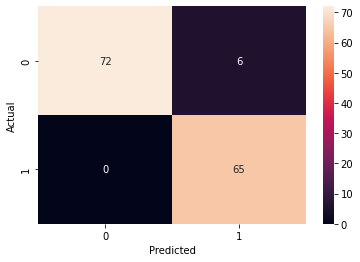

In [ ]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix 

predictions = (model2.predict(X_test) > 0.5).astype('int32').reshape(X_test.shape[0])
conf_matrix = confusion_matrix(predictions, y_test)

sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
# Classification report 
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.92      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
# Postive predictive and negative predictive value 
# Calculate the probability that a person tested positive will have the disease and the probability that a person tested negative will not have the disease respectively. 

tp = 65 
fp = 6 
fn = 0 
tn = 72 

ppv = tp / (tp + fp)
npv = tn / (tn + fn)

print(f'The positive predictive value is {round(ppv,2)}.')
print(f'The negative predictive value is {npv}.')

The positive predictive value is 0.92.
The negative predictive value is 1.0.


5/5 [==============================] - 0s 2ms/step
The auc is 0.97.


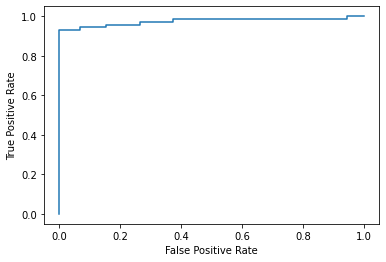

In [ ]:
# ROC
from sklearn.metrics import roc_curve 

fpr, tpr, _ = roc_curve(y_test, model2.predict(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#AU-ROC
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(y_test, model2.predict(X_test))
print(f'The auc is {round(auc,2)}.')